# Perform machine learning using genomic vectors

## Read data

In [1]:
import os
from pathlib import Path

import pandas as pd


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

dataDf = pd.read_csv(Path(dataDirName, 'data.csv'))
dataDf = dataDf.sort_values(by=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'], ascending=True)
dataDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,51211,17422049,2023-02-18,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
1,51211,17422049,2023-02-19,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
2,51211,17422049,2023-02-20,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
3,56089,14164983,2020-12-07,55.285714,39.000000,80.0,48.000000,51.000000,16.948100,79.000000,...,0.070711,0.767143,0.766667,0.767619,0.766667,0.767619,0.014142,2020-12-07,0.0,0.0
4,56089,14164983,2020-12-08,58.285714,34.000000,86.0,34.000000,70.000000,20.171880,70.833333,...,0.070711,0.810000,0.810000,0.810000,0.810000,0.810000,0.014142,2020-12-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231552,2662222,17201307,2022-12-30,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,120.880000,...,0.234087,0.910000,0.910000,0.910000,0.910000,0.910000,0.108044,2022-12-21,0.0,0.0
231553,2662222,17201307,2022-12-31,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,129.120000,...,0.183848,1.050000,1.010000,1.090000,1.090000,1.010000,0.056569,2022-12-21,0.0,0.0
231554,2662222,17201307,2023-01-01,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,126.000000,...,0.234087,0.900000,0.900000,0.900000,0.900000,0.900000,0.108044,2022-12-21,0.0,0.0
231555,2662222,17201307,2023-01-02,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,64.400000,...,0.234087,3.500000,3.500000,3.500000,3.500000,3.500000,0.108044,2022-12-21,0.0,0.0


### Vector data

In [2]:
import os
from pathlib import Path

import pandas as pd


vectorsDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_vec')
vectorsTestDf = pd.read_csv(Path(vectorsDir, 'gene_test_vectorised.csv'))
vectorsTestDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsTrainDf = pd.read_csv(Path(vectorsDir, 'gene_train_vectorised.csv'))
vectorsTrainDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsValDf = pd.read_csv(Path(vectorsDir, 'gene_val_vectorised.csv'))
vectorsValDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsDf = pd.concat([vectorsTestDf, vectorsTrainDf, vectorsValDf], ignore_index=True)
vectorsDf

,patient_id,tube_id,vector
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0..."
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0...."
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -..."
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0..."
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0..."
...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73..."
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60..."
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657..."
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68..."


### Tube ID mapping

In [3]:
import os
from pathlib import Path

import pandas as pd


patientTubeidMappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')
patientTubeidMappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


### Merge all the information

In [4]:
mergedDf = vectorsDf.merge(
    patientTubeidMappingDf[['tube_code', 'date_of_collection']].drop_duplicates(),
    how='inner',
    left_on=['tube_id'],
    right_on=['tube_code'],
).drop(
    columns=['tube_code']
).merge(
    dataDf,
    how='inner',
    left_on=['patient_id'],
    right_on=['PATIENT_ID']
).drop(
    columns=['patient_id']
)
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


In [5]:
mergedDf['date_of_collection'] = pd.to_datetime(mergedDf['date_of_collection'], format='%Y-%m-%d')
mergedDf['measurement_datetime'] = pd.to_datetime(mergedDf['measurement_datetime'], format='%Y-%m-%d')
mergedDf['Organism_FIRST_NOTED'] = pd.to_datetime(mergedDf['Organism_FIRST_NOTED'], format='%Y-%m-%d')
mergedDf

,tube_id,vector,date_of_collection,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
1,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-30,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
2,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
3,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",2019-10-31,2097130,12971391,2019-10-31,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
4,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",2020-09-14,2097130,12971391,2019-10-29,69.750,64.0,77.0,77.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2019-10-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7007,AH21B002,"[0.35204654932022095, 0.4347085654735565, 0.68...",2021-02-02,211314,13955099,2021-01-27,70.000,64.0,76.0,73.0,...,0.106066,0.7,0.7,0.7,0.7,0.7,0.074568,2020-10-28,1.0,1.0
7008,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-11,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0
7009,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60...",2021-01-16,2191641,14094077,2020-11-12,54.625,48.0,70.0,50.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2021-01-16,0.0,0.0


## Perform ML

### Vectors only

#### Create data

In [6]:
vectorsOnlyDf = mergedDf.groupby(by=['PATIENT_ID', 'vector']).agg(sepsis_max = pd.NamedAgg(column="sepsis", aggfunc="max")).reset_index()
vectorsOnlyDf

,PATIENT_ID,vector,sepsis_max
0,211314,"[0.35204654932022095, 0.4347085654735565, 0.68...",1.0
1,635723,"[-0.7733622789382935, -0.857825756072998, -1.2...",1.0
2,677694,"[-0.26666897535324097, -0.15388357639312744, -...",1.0
3,2080376,"[-0.7040156722068787, -0.7689500451087952, -1....",1.0
4,2080648,"[-0.724036455154419, -0.7798390984535217, -1.1...",0.0
5,2082838,"[-0.6733225584030151, -0.7025085091590881, -1....",1.0
6,2091319,"[-0.7040837407112122, -0.7633625268936157, -1....",1.0
7,2091697,"[-0.7107170820236206, -0.7737107872962952, -1....",1.0
8,2097130,"[-0.3853421211242676, -0.2268281728029251, -0....",0.0
9,2097130,"[-0.39271822571754456, -0.22921983897686005, -...",0.0


In [7]:
import ast
import numpy as np


X = vectorsOnlyDf['vector']
X = X.apply(ast.literal_eval)
X=np.vstack(X).astype(np.float32)
Y = vectorsOnlyDf['sepsis_max'].apply(lambda x: 1 if x else 0)
Y=np.vstack(Y).astype(np.float32)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((36, 300), (5, 300), (36, 1), (5, 1))

In [9]:
import torch
from torch import nn
import torch.utils.data as data


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(X_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)

In [10]:
print(X_train_tensor.shape, Y_train_tensor.shape, X_test_tensor.shape, Y_test_tensor.shape)

torch.Size([36, 300]) torch.Size([36, 1]) torch.Size([5, 300]) torch.Size([5, 1])


In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [12]:
class DnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(X_train_tensor.shape[1], int(X_train_tensor.shape[1]/2))
        self.linear2 = nn.Linear(int(X_train_tensor.shape[1]/2), 1)
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        # return self.linear2(self.dropout(self.relu(self.linear1(x))))
        return self.linear2(self.relu(self.linear1(x)))

In [13]:
model = DnnModel().to(device)
model

DnnModel(
  (linear1): Linear(in_features=300, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=1, bias=True)
  (relu): ReLU()
)

In [14]:
learning_rate = 0.01

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [15]:
# Forward pass
logits = model(X_train_tensor)

In [16]:
pred_probab = torch.round(torch.sigmoid(logits))

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [18]:
# Number of epochs
epochs = 2000

# Send data to the device
x_train, x_valid = X_train_tensor.to(device), X_test_tensor.to(device)
y_train, y_valid = Y_train_tensor.to(device), Y_test_tensor.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train) # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid)
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.70272, Accuracy: 33.33% | Validation Loss: 0.72639, Accuracy: 0.00%
Epoch:  100 | Train Loss: 0.62478, Accuracy: 66.67% | Validation Loss: 0.45791, Accuracy: 80.00%
Epoch:  200 | Train Loss: 0.61849, Accuracy: 66.67% | Validation Loss: 0.42862, Accuracy: 80.00%
Epoch:  300 | Train Loss: 0.61670, Accuracy: 66.67% | Validation Loss: 0.42976, Accuracy: 80.00%
Epoch:  400 | Train Loss: 0.61572, Accuracy: 66.67% | Validation Loss: 0.43314, Accuracy: 80.00%
Epoch:  500 | Train Loss: 0.61500, Accuracy: 66.67% | Validation Loss: 0.43517, Accuracy: 80.00%
Epoch:  600 | Train Loss: 0.61436, Accuracy: 66.67% | Validation Loss: 0.43610, Accuracy: 80.00%
Epoch:  700 | Train Loss: 0.61374, Accuracy: 66.67% | Validation Loss: 0.43649, Accuracy: 80.00%
Epoch:  800 | Train Loss: 0.61313, Accuracy: 66.67% | Validation Loss: 0.43666, Accuracy: 80.00%
Epoch:  900 | Train Loss: 0.61252, Accuracy: 66.67% | Validation Loss: 0.43657, Accuracy: 80.00%
Epoch: 1000 | Train Loss: 0.611

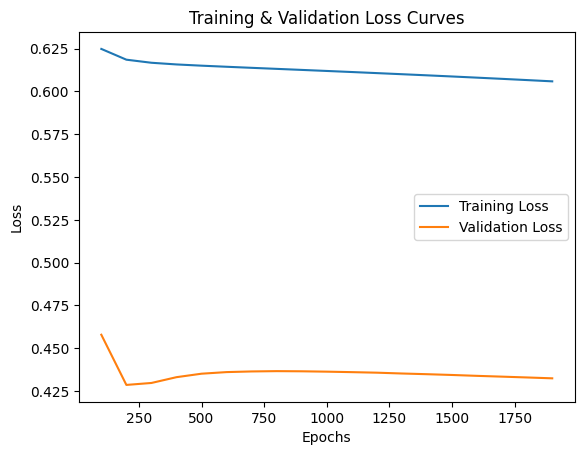

In [19]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Measurements only

#### Prepare data

In [76]:
rowsX = []
rowsY = []
for name, group in mergedDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']):
    low = 0
    high = 3
    while high <= group.shape[0]:
        valuesList = []
        for col in mergedDf.columns[~mergedDf.columns.isin(['tube_id', 'vector', 'date_of_collection', 'PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis'])]:
            valuesList.append(list(group[col][low: high]))
        rowsX.append(
            [[*x] for x in zip(*valuesList)]
            )
        rowsY.append(group.target[(high - 1): high].values[0])
        high += 1
        low += 1

In [77]:
import numpy as np


X = np.array(rowsX)
Y = np.array(rowsY)

In [78]:
X.shape, Y.shape

((6887, 3, 223), (6887,))

In [79]:
np.unique(Y, return_counts=True)[1]/Y.shape[0]

array([0.40438507, 0.59561493])

In [80]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5509, 3, 223), (1378, 3, 223), (5509,), (1378,))

#### NB Classifier model

In [84]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_score = gnb.fit(X_train.reshape((X_train.shape[0], 3*X.shape[2])), Y_train).predict_proba(X_test.reshape((X_test.shape[0], 3*X.shape[2])))
y_pred = gnb.fit(X_train.reshape((X_train.shape[0], 3*X.shape[2])), Y_train).predict(X_test.reshape((X_test.shape[0], 3*X.shape[2])))

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


print('Accuracy', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy', balanced_accuracy_score(Y_test, y_pred))
print('F1 Score', f1_score(Y_test, y_pred))
print('Precision Score', precision_score(Y_test, y_pred))
print('Recall Score', recall_score(Y_test, y_pred))
print('roc_auc_score', roc_auc_score(Y_test, [y[1] for y in y_score]))

Accuracy 1.0
Balanced Accuracy 1.0
F1 Score 1.0
Precision Score 1.0
Recall Score 1.0
roc_auc_score 1.0


#### LR Classifier

In [87]:
from sklearn.linear_model import LogisticRegression


lrc = LogisticRegression(random_state=0)
y_score = lrc.fit(X_train.reshape((X_train.shape[0], 3*X.shape[2])), Y_train).predict_proba(X_test.reshape((X_test.shape[0], 3*X.shape[2])))
y_pred = lrc.fit(X_train.reshape((X_train.shape[0], 3*X.shape[2])), Y_train).predict(X_test.reshape((X_test.shape[0], 3*X.shape[2])))

/home/vmadmin/workspace/sepsis_predictor/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vmadmin/workspace/sepsis_predictor/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print('Accuracy', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy', balanced_accuracy_score(Y_test, y_pred))
print('F1 Score', f1_score(Y_test, y_pred))
print('Precision Score', precision_score(Y_test, y_pred))
print('Recall Score', recall_score(Y_test, y_pred))
print('roc_auc_score', roc_auc_score(Y_test, [y[1] for y in y_score]))

Accuracy 0.6451378809869376
Balanced Accuracy 0.6980562939054491
F1 Score 0.6158680282796544
Precision Score 0.48098159509202454
Recall Score 0.8558951965065502
roc_auc_score 0.7903621606227454


#### XGBoost Classifier

In [89]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train.reshape((X_train.shape[0], 3*X.shape[2])), Y_train)
# make predictions
y_score = bst.predict_proba(X_test.reshape((X_test.shape[0], 3*X.shape[2])))
y_pred = bst.predict(X_test.reshape((X_test.shape[0], 3*X.shape[2])))

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print('Accuracy', accuracy_score(Y_test, y_pred))
print('Balanced Accuracy', balanced_accuracy_score(Y_test, y_pred))
print('F1 Score', f1_score(Y_test, y_pred))
print('Precision Score', precision_score(Y_test, y_pred))
print('Recall Score', recall_score(Y_test, y_pred))
print('roc_auc_score', roc_auc_score(Y_test, [y[1] for y in y_score]))

Accuracy 1.0
Balanced Accuracy 1.0
F1 Score 1.0
Precision Score 1.0
Recall Score 1.0
roc_auc_score 1.0


#### DNN using Pytorch

In [58]:
import torch
from torch import nn

In [91]:
X_train_tensor = torch.tensor(X_train.reshape((X_train.shape[0], 3*X.shape[2])), dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.reshape((X_test.shape[0], 3*X.shape[2])), dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

In [92]:
X_train.shape

(5509, 3, 223)

In [93]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [106]:
class DnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3*X.shape[2], 512)
        self.linear2 = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        # return self.linear2(self.dropout(self.relu(self.linear1(x))))
        return self.linear2(self.relu(self.linear1(x)))

In [107]:
model = DnnModel().to(device)
model

DnnModel(
  (linear1): Linear(in_features=669, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=1, bias=True)
  (relu): ReLU()
)

In [108]:
learning_rate = 0.01

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [109]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [110]:
# Number of epochs
epochs = 5000

# Send data to the device
x_train, x_valid = X_train_tensor.to(device), X_test_tensor.to(device)
y_train, y_valid = Y_train_tensor.to(device), Y_test_tensor.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid).squeeze()
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 32.49894, Accuracy: 33.85% | Validation Loss: 9618.13184, Accuracy: 33.24%
Epoch:  250 | Train Loss: 0.65556, Accuracy: 67.20% | Validation Loss: 0.72405, Accuracy: 34.33%
Epoch:  500 | Train Loss: 0.63692, Accuracy: 67.18% | Validation Loss: 0.77290, Accuracy: 34.33%
Epoch:  750 | Train Loss: 0.63362, Accuracy: 66.89% | Validation Loss: 0.80789, Accuracy: 34.11%
Epoch: 1000 | Train Loss: 0.63259, Accuracy: 66.85% | Validation Loss: 0.82709, Accuracy: 34.11%
Epoch: 1250 | Train Loss: 0.63351, Accuracy: 66.76% | Validation Loss: 0.84328, Accuracy: 34.11%
Epoch: 1500 | Train Loss: 0.63351, Accuracy: 66.75% | Validation Loss: 0.84896, Accuracy: 34.11%
Epoch: 1750 | Train Loss: 0.63355, Accuracy: 66.75% | Validation Loss: 0.85355, Accuracy: 34.11%
Epoch: 2000 | Train Loss: 0.63354, Accuracy: 66.75% | Validation Loss: 0.85460, Accuracy: 34.11%
Epoch: 2250 | Train Loss: 0.63354, Accuracy: 66.75% | Validation Loss: 0.85521, Accuracy: 34.11%
Epoch: 2500 | Train Loss: 

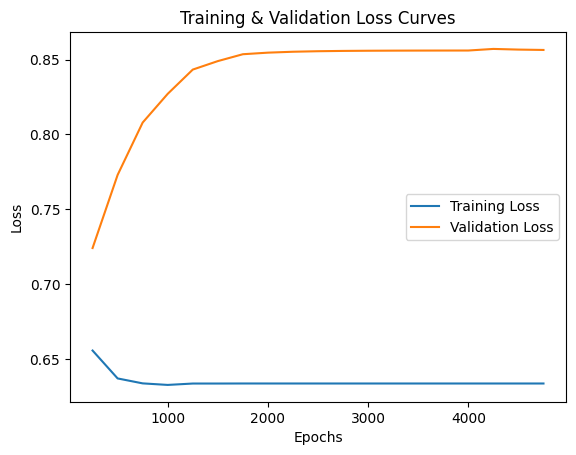

In [111]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#### LSTM using Pytorch

In [112]:
import torch
from torch import nn
import torch.utils.data as data

In [113]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(X_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)


In [114]:
print(X_train_tensor.shape, Y_train_tensor.shape, X_test_tensor.shape, Y_test_tensor.shape)

torch.Size([5509, 3, 223]) torch.Size([5509]) torch.Size([1378, 3, 223]) torch.Size([1378])


In [115]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [121]:
class LstmModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=X.shape[2], hidden_size=1024, num_layers=1, batch_first=True)
        self.linear = nn.Linear(1024, 1)

    def forward(self, x):
        x, _ = self.lstm(x)          # -> (batch_size, seq_len, n_hidden)
        x = x[:, -1, :]
        x = self.linear(x)                  # -> (batch_size * seq_len, vocab_size)
        return x

In [122]:
model = LstmModel().to(device)
model

LstmModel(
  (lstm): LSTM(223, 1024, batch_first=True)
  (linear): Linear(in_features=1024, out_features=1, bias=True)
)

In [123]:
learning_rate = 0.001

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

In [124]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [125]:
# Number of epochs
epochs = 200

# Send data to the device
# x_train, x_valid = x_data.to(device), x_data.to(device)
# y_train, y_valid = y_data.to(device), y_data.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    for X_batch, y_batch in loader:
        y_logits = model(X_batch).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
        y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

        # print(y_logits.shape, y_batch.shape)

        loss = loss_fn(y_logits, y_batch) # compute the loss
        acc = accuracy_fn(y_batch.int(), y_pred) # calculate the accuracy; convert the labels to integers

        optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
        loss.backward() # backward pass: backpropagate the prediction loss
        optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass

    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        # Put the model in evaluation mode
        model.eval()

        with torch.inference_mode():
            y_logits = model(X_train_tensor).squeeze()
            y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

            loss = loss_fn(y_logits, Y_train_tensor) # compute the loss
            acc = accuracy_fn(Y_train_tensor.int(), y_pred) # calculate the accuracy; convert the labels to integers

            valid_logits = model(X_test_tensor).squeeze()
            valid_pred = torch.round(torch.sigmoid(valid_logits))

            valid_loss = loss_fn(valid_logits, Y_test_tensor)
            valid_acc = accuracy_fn(Y_test_tensor.int(), valid_pred)
        
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.60455, Accuracy: 73.46% | Validation Loss: 0.78178, Accuracy: 33.74%
Epoch:   10 | Train Loss: 0.45641, Accuracy: 79.78% | Validation Loss: 0.83937, Accuracy: 33.60%
Epoch:   20 | Train Loss: 0.40752, Accuracy: 84.32% | Validation Loss: 0.84631, Accuracy: 34.33%
Epoch:   30 | Train Loss: 0.37274, Accuracy: 87.40% | Validation Loss: 0.82595, Accuracy: 37.95%
Epoch:   40 | Train Loss: 0.34936, Accuracy: 89.33% | Validation Loss: 0.84948, Accuracy: 36.07%
Epoch:   50 | Train Loss: 0.32280, Accuracy: 90.83% | Validation Loss: 0.83825, Accuracy: 36.65%
Epoch:   60 | Train Loss: 0.30631, Accuracy: 91.41% | Validation Loss: 0.86204, Accuracy: 36.79%
Epoch:   70 | Train Loss: 0.29243, Accuracy: 92.25% | Validation Loss: 0.85272, Accuracy: 36.57%
Epoch:   80 | Train Loss: 0.27642, Accuracy: 92.38% | Validation Loss: 0.86914, Accuracy: 35.78%
Epoch:   90 | Train Loss: 0.26481, Accuracy: 92.67% | Validation Loss: 0.88037, Accuracy: 35.78%
Epoch:  100 | Train Loss: 0.25

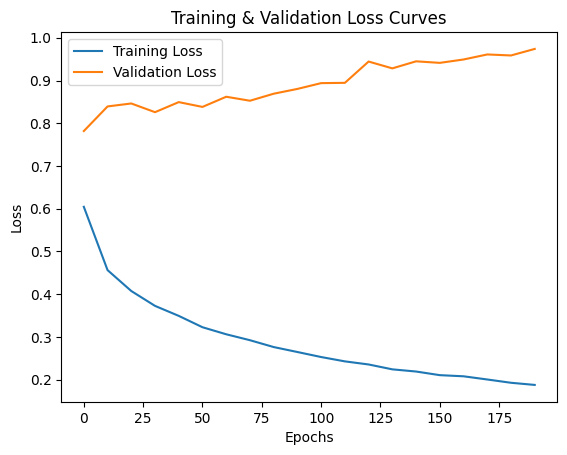

In [126]:
from matplotlib import pyplot as plt


plt.plot(epoch_count, train_loss_values, label='Training Loss')
plt.plot(epoch_count, valid_loss_values, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()